In [2]:
# IMPORTING LIBRARIES

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
%matplotlib inline
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
import optuna
from optuna import Trial, visualization
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


ModuleNotFoundError: No module named 'xgboost'

In [2]:
train = pd.read_csv('../input/cascade-cup-22/train.csv')
train

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:16,130226,2021-02-06 00:00:00,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,NaN,NaN,NaN,369.516667,NaN
449996,2021-02-06 10:03:17,130227,2021-02-06 00:00:00,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,NaN,NaN,NaN,239.133333,NaN
449997,2021-02-06 10:03:18,130228,2021-02-06 00:00:00,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,NaN,NaN,NaN,204.150000,NaN
449998,2021-02-06 10:03:19,130229,2021-02-06 00:00:00,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,NaN,NaN,NaN,65.583333,NaN


In [3]:
train['order_hour'] = pd.to_datetime(train['order_time']).dt.hour
train['order_minute'] = pd.to_datetime(train['order_time']).dt.minute

train['allot_hour1'] = pd.to_datetime(train['allot_time']).dt.hour
train['allot_minute1'] = pd.to_datetime(train['allot_time']).dt.minute

train['accept_hour2'] = pd.to_datetime(train['accept_time']).dt.hour
train['accept_minute2'] = pd.to_datetime(train['accept_time']).dt.minute


In [4]:
train

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,...,reassignment_reason,reassigned_order,session_time,cancelled_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,...,NaN,NaN,NaN,NaN,2,21,2,21,2.0,22.0
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,...,NaN,NaN,3.266667,NaN,2,33,2,33,2.0,34.0
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,...,NaN,NaN,9.816667,NaN,2,39,2,39,2.0,40.0
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,...,NaN,NaN,17.533333,NaN,2,47,2,48,2.0,49.0
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,...,NaN,NaN,1.350000,NaN,3,6,3,7,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:16,130226,2021-02-06 00:00:00,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,...,NaN,NaN,369.516667,NaN,10,3,10,3,10.0,4.0
449996,2021-02-06 10:03:17,130227,2021-02-06 00:00:00,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,...,NaN,NaN,239.133333,NaN,10,3,10,3,10.0,4.0
449997,2021-02-06 10:03:18,130228,2021-02-06 00:00:00,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,...,NaN,NaN,204.150000,NaN,10,3,10,4,10.0,4.0
449998,2021-02-06 10:03:19,130229,2021-02-06 00:00:00,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,...,NaN,NaN,65.583333,NaN,10,3,10,3,10.0,5.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='accept_hour2', ylabel='Density'>

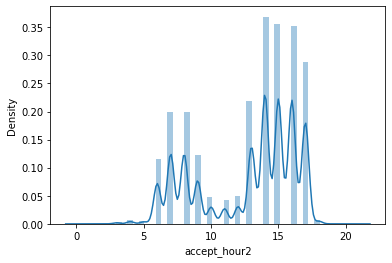

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.distplot(train['accept_hour2'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_minute', ylabel='Density'>

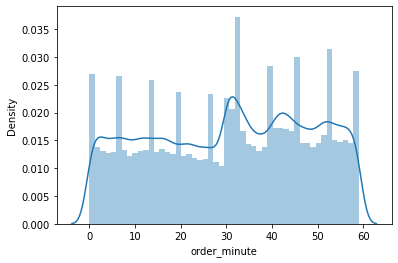

In [6]:
sns.distplot(train['order_minute'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_mile_distance', ylabel='Density'>

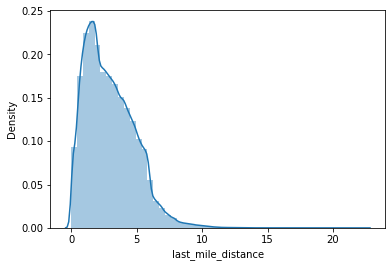

In [7]:
sns.distplot(train['last_mile_distance'])

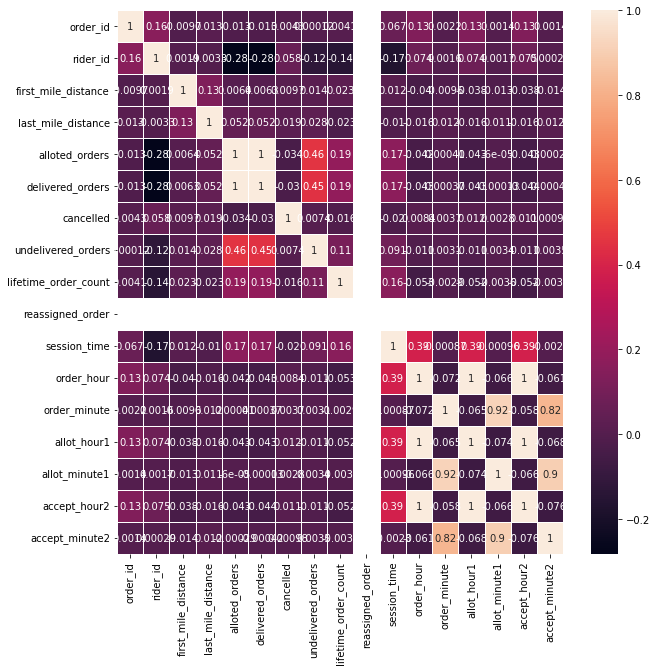

In [8]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0)
plt.show()

In [9]:
train.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,session_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,13753.0,446325.000000,450000.000000,450000.000000,450000.000000,450000.000000,449843.000000,449843.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,1.0,220.474779,12.723800,30.595551,12.743922,30.595491,12.761343,30.561667
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.0,176.713853,3.619623,17.191479,3.620996,17.213032,3.621517,17.269258
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,1.0,84.100000,9.000000,16.000000,9.000000,16.000000,9.000000,16.000000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,1.0,175.550000,14.000000,32.000000,14.000000,32.000000,14.000000,32.000000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,1.0,316.766667,16.000000,45.000000,16.000000,45.000000,16.000000,45.000000
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.0,1298.966667,21.000000,59.000000,21.000000,59.000000,21.000000,59.000000


In [10]:
test = pd.read_csv('../input/cascade-cup-22/test.csv')
test

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
0,2021-02-06 10:03:24,130231,2021-02-06 00:00:00,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.658500,4.54,216.0,215.0,1.0,747.0,NaN,NaN,NaN,273.400000
1,2021-02-06 10:03:26,130232,2021-02-06 00:00:00,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.070900,5.84,52.0,52.0,0.0,75.0,NaN,NaN,NaN,252.100000
2,2021-02-06 10:03:27,130233,2021-02-06 00:00:00,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.388400,0.99,289.0,289.0,0.0,2214.0,NaN,NaN,NaN,241.383333
3,2021-02-06 10:03:29,130234,2021-02-06 00:00:00,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.903900,2.59,125.0,122.0,3.0,1020.0,NaN,NaN,NaN,291.933333
4,2021-02-06 10:03:35,130235,2021-02-06 00:00:00,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.827500,0.94,352.0,350.0,2.0,7284.0,NaN,NaN,NaN,247.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144839,2021-02-09 20:13:39,41184,2021-02-09 00:00:00,2021-02-09 20:13:40,2021-02-09 20:13:49,7141,1.417000,3.96,52.0,52.0,0.0,413.0,NaN,NaN,NaN,179.266667
144840,2021-02-09 20:21:36,41185,2021-02-09 00:00:00,2021-02-09 20:21:59,2021-02-09 20:22:33,8113,0.775600,1.61,95.0,93.0,2.0,284.0,NaN,NaN,NaN,244.400000
144841,2021-02-09 20:24:25,41186,2021-02-09 00:00:00,2021-02-09 20:25:03,2021-02-09 20:26:10,5040,2.049400,1.26,77.0,77.0,0.0,119.0,NaN,NaN,NaN,259.000000
144842,2021-02-09 20:28:07,41187,2021-02-09 00:00:00,2021-02-09 20:28:29,2021-02-09 20:28:53,2946,0.080494,5.50,231.0,228.0,3.0,1759.0,NaN,NaN,NaN,814.283333


In [11]:
test['order_hour'] = pd.to_datetime(test['order_time']).dt.hour
test['order_minute'] = pd.to_datetime(test['order_time']).dt.minute

test['allot_hour1'] = pd.to_datetime(test['allot_time']).dt.hour
test['allot_minute1'] = pd.to_datetime(test['allot_time']).dt.minute

test['accept_hour2'] = pd.to_datetime(test['accept_time']).dt.hour
test['accept_minute2'] = pd.to_datetime(test['accept_time']).dt.minute


In [12]:
test

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,...,reassignment_method,reassignment_reason,reassigned_order,session_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2
0,2021-02-06 10:03:24,130231,2021-02-06 00:00:00,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.658500,4.54,216.0,215.0,...,NaN,NaN,NaN,273.400000,10,3,10,3,10.0,4.0
1,2021-02-06 10:03:26,130232,2021-02-06 00:00:00,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.070900,5.84,52.0,52.0,...,NaN,NaN,NaN,252.100000,10,3,10,3,10.0,3.0
2,2021-02-06 10:03:27,130233,2021-02-06 00:00:00,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.388400,0.99,289.0,289.0,...,NaN,NaN,NaN,241.383333,10,3,10,4,10.0,5.0
3,2021-02-06 10:03:29,130234,2021-02-06 00:00:00,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.903900,2.59,125.0,122.0,...,NaN,NaN,NaN,291.933333,10,3,10,3,10.0,3.0
4,2021-02-06 10:03:35,130235,2021-02-06 00:00:00,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.827500,0.94,352.0,350.0,...,NaN,NaN,NaN,247.133333,10,3,10,3,10.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144839,2021-02-09 20:13:39,41184,2021-02-09 00:00:00,2021-02-09 20:13:40,2021-02-09 20:13:49,7141,1.417000,3.96,52.0,52.0,...,NaN,NaN,NaN,179.266667,20,13,20,13,20.0,13.0
144840,2021-02-09 20:21:36,41185,2021-02-09 00:00:00,2021-02-09 20:21:59,2021-02-09 20:22:33,8113,0.775600,1.61,95.0,93.0,...,NaN,NaN,NaN,244.400000,20,21,20,21,20.0,22.0
144841,2021-02-09 20:24:25,41186,2021-02-09 00:00:00,2021-02-09 20:25:03,2021-02-09 20:26:10,5040,2.049400,1.26,77.0,77.0,...,NaN,NaN,NaN,259.000000,20,24,20,25,20.0,26.0
144842,2021-02-09 20:28:07,41187,2021-02-09 00:00:00,2021-02-09 20:28:29,2021-02-09 20:28:53,2946,0.080494,5.50,231.0,228.0,...,NaN,NaN,NaN,814.283333,20,28,20,28,20.0,28.0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

In [14]:
train['reassignment_reason'].unique()

array([nan, 'Reassignment Request from SE portal.',
       'Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
       'Reassign'], dtype=object)

In [15]:
train['order_time'] = pd.to_datetime(train['order_time'])
train['accept_time'] = pd.to_datetime(train['accept_time'])
train['allot_time'] = pd.to_datetime(train['allot_time'])
train['Acceptance_Time'] = (train['accept_time'] - train['allot_time'])
train['Allotment_Time'] = (train['allot_time'] - train['order_time'])

test['order_time'] = pd.to_datetime(test['order_time'])
test['accept_time'] = pd.to_datetime(test['accept_time'])
test['allot_time'] = pd.to_datetime(test['allot_time'])
test['Acceptance_Time'] = (test['accept_time'] - test['allot_time'])
test['Allotment_Time'] = (test['allot_time'] - test['order_time'])

train['Acceptance_Time'] = pd.to_numeric(train['Acceptance_Time'].dt.seconds,downcast = 'integer')
test['Acceptance_Time'] = pd.to_numeric(test['Acceptance_Time'].dt.seconds,downcast = 'integer')

train['Acceptance_Time']=train['Acceptance_Time'].fillna(0)
test['Acceptance_Time']=test['Acceptance_Time'].fillna(0)

train['Allotment_Time'] = pd.to_numeric(train['Allotment_Time'].dt.seconds,downcast = 'integer')
test['Allotment_Time'] = pd.to_numeric(test['Allotment_Time'].dt.seconds,downcast = 'integer')

train['Allotment_Time']=train['Allotment_Time'].fillna(0)
test['Allotment_Time']=test['Allotment_Time'].fillna(0)

train['session_time']=train['session_time'].fillna(180)
test['session_time']=test['session_time'].fillna(180)


In [16]:
train

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,...,session_time,cancelled_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2,Acceptance_Time,Allotment_Time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,...,180.000000,NaN,2,21,2,21,2.0,22.0,9.0,24
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,...,3.266667,NaN,2,33,2,33,2.0,34.0,48.0,41
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,...,9.816667,NaN,2,39,2,39,2.0,40.0,16.0,8
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,...,17.533333,NaN,2,47,2,48,2.0,49.0,41.0,32
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,...,1.350000,NaN,3,6,3,7,3.0,7.0,36.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:16,130226,2021-02-06 00:00:00,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,...,369.516667,NaN,10,3,10,3,10.0,4.0,30.0,28
449996,2021-02-06 10:03:17,130227,2021-02-06 00:00:00,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,...,239.133333,NaN,10,3,10,3,10.0,4.0,76.0,1
449997,2021-02-06 10:03:18,130228,2021-02-06 00:00:00,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,...,204.150000,NaN,10,3,10,4,10.0,4.0,33.0,48
449998,2021-02-06 10:03:19,130229,2021-02-06 00:00:00,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,...,65.583333,NaN,10,3,10,3,10.0,5.0,142.0,0


In [17]:
train.drop(['allot_time','accept_time','pickup_time','delivered_time','order_id'],axis =1,inplace= True)
test.drop(['allot_time','accept_time','order_id'],axis =1,inplace= True)

In [18]:
train

,order_time,order_date,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,...,session_time,cancelled_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2,Acceptance_Time,Allotment_Time
0,2021-01-26 02:21:35,2021-01-26 00:00:00,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,...,180.000000,NaN,2,21,2,21,2.0,22.0,9.0,24
1,2021-01-26 02:33:16,2021-01-26 00:00:00,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,...,3.266667,NaN,2,33,2,33,2.0,34.0,48.0,41
2,2021-01-26 02:39:49,2021-01-26 00:00:00,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,...,9.816667,NaN,2,39,2,39,2.0,40.0,16.0,8
3,2021-01-26 02:47:53,2021-01-26 00:00:00,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,...,17.533333,NaN,2,47,2,48,2.0,49.0,41.0,32
4,2021-01-26 03:06:30,2021-01-26 00:00:00,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,...,1.350000,NaN,3,6,3,7,3.0,7.0,36.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:16,2021-02-06 00:00:00,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,...,369.516667,NaN,10,3,10,3,10.0,4.0,30.0,28
449996,2021-02-06 10:03:17,2021-02-06 00:00:00,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,...,239.133333,NaN,10,3,10,3,10.0,4.0,76.0,1
449997,2021-02-06 10:03:18,2021-02-06 00:00:00,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,...,204.150000,NaN,10,3,10,4,10.0,4.0,33.0,48
449998,2021-02-06 10:03:19,2021-02-06 00:00:00,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,...,65.583333,NaN,10,3,10,3,10.0,5.0,142.0,0


In [19]:
train['reassigned_order']=train['reassigned_order'].ffill()
test['reassigned_order']=test['reassigned_order'].ffill()

train['reassignment_reason']=train['reassignment_reason'].fillna('0')
test['reassignment_reason']=test['reassignment_reason'].fillna('0')

train['reassignment_method']=train['reassignment_method'].fillna('0')
test['reassignment_method']=test['reassignment_method'].fillna('0')

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
train["reassigned_order"] = ord_enc.fit_transform(train[["reassigned_order"]])
test["reassigned_order"] = ord_enc.fit_transform(test[["reassigned_order"]])

train["reassignment_reason"] = ord_enc.fit_transform(train[["reassignment_reason"]])
test["reassignment_reason"] = ord_enc.fit_transform(test[["reassignment_reason"]])

train['reassignment_method'] = ord_enc.fit_transform(train[["reassignment_method"]])
test["reassignment_method"] = ord_enc.fit_transform(test[["reassignment_method"]])

In [20]:
train

,order_time,order_date,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,...,session_time,cancelled_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2,Acceptance_Time,Allotment_Time
0,2021-01-26 02:21:35,2021-01-26 00:00:00,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,...,180.000000,NaN,2,21,2,21,2.0,22.0,9.0,24
1,2021-01-26 02:33:16,2021-01-26 00:00:00,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,...,3.266667,NaN,2,33,2,33,2.0,34.0,48.0,41
2,2021-01-26 02:39:49,2021-01-26 00:00:00,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,...,9.816667,NaN,2,39,2,39,2.0,40.0,16.0,8
3,2021-01-26 02:47:53,2021-01-26 00:00:00,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,...,17.533333,NaN,2,47,2,48,2.0,49.0,41.0,32
4,2021-01-26 03:06:30,2021-01-26 00:00:00,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,...,1.350000,NaN,3,6,3,7,3.0,7.0,36.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:16,2021-02-06 00:00:00,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,...,369.516667,NaN,10,3,10,3,10.0,4.0,30.0,28
449996,2021-02-06 10:03:17,2021-02-06 00:00:00,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,...,239.133333,NaN,10,3,10,3,10.0,4.0,76.0,1
449997,2021-02-06 10:03:18,2021-02-06 00:00:00,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,...,204.150000,NaN,10,3,10,4,10.0,4.0,33.0,48
449998,2021-02-06 10:03:19,2021-02-06 00:00:00,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,...,65.583333,NaN,10,3,10,3,10.0,5.0,142.0,0


In [21]:
train['order_time'] = pd.to_datetime(train['order_time']).dt.time
train['order_date'] = pd.to_datetime(train['order_date']).dt.date

test['order_time'] = pd.to_datetime(test['order_time']).dt.time
test['order_date'] = pd.to_datetime(test['order_date']).dt.date


In [22]:
train

,order_time,order_date,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,...,session_time,cancelled_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2,Acceptance_Time,Allotment_Time
0,02:21:35,2021-01-26,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,...,180.000000,NaN,2,21,2,21,2.0,22.0,9.0,24
1,02:33:16,2021-01-26,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,...,3.266667,NaN,2,33,2,33,2.0,34.0,48.0,41
2,02:39:49,2021-01-26,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,...,9.816667,NaN,2,39,2,39,2.0,40.0,16.0,8
3,02:47:53,2021-01-26,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,...,17.533333,NaN,2,47,2,48,2.0,49.0,41.0,32
4,03:06:30,2021-01-26,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,...,1.350000,NaN,3,6,3,7,3.0,7.0,36.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,10:03:16,2021-02-06,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,...,369.516667,NaN,10,3,10,3,10.0,4.0,30.0,28
449996,10:03:17,2021-02-06,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,...,239.133333,NaN,10,3,10,3,10.0,4.0,76.0,1
449997,10:03:18,2021-02-06,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,...,204.150000,NaN,10,3,10,4,10.0,4.0,33.0,48
449998,10:03:19,2021-02-06,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,...,65.583333,NaN,10,3,10,3,10.0,5.0,142.0,0


In [23]:
train = train.dropna(axis=0,subset =['undelivered_orders'])

In [24]:
train['efficiency'] = train['delivered_orders'] / train['alloted_orders']
test['efficiency'] = test['delivered_orders'] / test['alloted_orders']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
train['total_distance']= train['first_mile_distance'] + train['last_mile_distance']
test['total_distance']= test['first_mile_distance'] + test['last_mile_distance']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
train.drop(['alloted_orders','undelivered_orders','first_mile_distance','total_distance'],axis =1,inplace= True)
test.drop(['alloted_orders','undelivered_orders','first_mile_distance','total_distance'],axis =1,inplace= True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
train.drop(['order_time','reassignment_method','reassigned_order','reassignment_reason'],axis =1,inplace= True)
test.drop(['order_time','reassignment_method','reassigned_order','reassignment_reason'],axis =1,inplace= True)

In [28]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
train["order_date"] = ord_enc.fit_transform(train[["order_date"]])
test["order_date"] = ord_enc.fit_transform(test[["order_date"]])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
train

,order_date,rider_id,last_mile_distance,delivered_orders,cancelled,lifetime_order_count,session_time,cancelled_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2,Acceptance_Time,Allotment_Time,efficiency
0,0.0,11696,2.65,46.0,0,621.0,180.000000,NaN,2,21,2,21,2.0,22.0,9.0,24,1.0
1,0.0,18117,2.76,8.0,0,105.0,3.266667,NaN,2,33,2,33,2.0,34.0,48.0,41,1.0
2,0.0,18623,4.80,1.0,0,66.0,9.816667,NaN,2,39,2,39,2.0,40.0,16.0,8,1.0
3,0.0,15945,6.38,1.0,0,127.0,17.533333,NaN,2,47,2,48,2.0,49.0,41.0,32,1.0
4,0.0,17589,4.01,34.0,0,84.0,1.350000,NaN,3,6,3,7,3.0,7.0,36.0,51,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,11.0,1006,0.19,4.0,0,127.0,369.516667,NaN,10,3,10,3,10.0,4.0,30.0,28,1.0
449996,11.0,279,1.19,81.0,0,105.0,239.133333,NaN,10,3,10,3,10.0,4.0,76.0,1,1.0
449997,11.0,3161,1.61,28.0,0,1488.0,204.150000,NaN,10,3,10,4,10.0,4.0,33.0,48,1.0
449998,11.0,9396,4.68,72.0,0,105.0,65.583333,NaN,10,3,10,3,10.0,5.0,142.0,0,1.0


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432659 entries, 0 to 449999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_date            432659 non-null  float64
 1   rider_id              432659 non-null  int64  
 2   last_mile_distance    432659 non-null  float64
 3   delivered_orders      432659 non-null  float64
 4   cancelled             432659 non-null  int64  
 5   lifetime_order_count  432659 non-null  float64
 6   session_time          432659 non-null  float64
 7   cancelled_time        4363 non-null    object 
 8   order_hour            432659 non-null  int64  
 9   order_minute          432659 non-null  int64  
 10  allot_hour1           432659 non-null  int64  
 11  allot_minute1         432659 non-null  int64  
 12  accept_hour2          432520 non-null  float64
 13  accept_minute2        432520 non-null  float64
 14  Acceptance_Time       432659 non-null  float64
 15  

In [31]:
test['lifetime_order_count'] = test['lifetime_order_count'].fillna(828)
test['efficiency'] = test['efficiency'].fillna(0.99)

In [32]:
train

,order_date,rider_id,last_mile_distance,delivered_orders,cancelled,lifetime_order_count,session_time,cancelled_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2,Acceptance_Time,Allotment_Time,efficiency
0,0.0,11696,2.65,46.0,0,621.0,180.000000,NaN,2,21,2,21,2.0,22.0,9.0,24,1.0
1,0.0,18117,2.76,8.0,0,105.0,3.266667,NaN,2,33,2,33,2.0,34.0,48.0,41,1.0
2,0.0,18623,4.80,1.0,0,66.0,9.816667,NaN,2,39,2,39,2.0,40.0,16.0,8,1.0
3,0.0,15945,6.38,1.0,0,127.0,17.533333,NaN,2,47,2,48,2.0,49.0,41.0,32,1.0
4,0.0,17589,4.01,34.0,0,84.0,1.350000,NaN,3,6,3,7,3.0,7.0,36.0,51,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,11.0,1006,0.19,4.0,0,127.0,369.516667,NaN,10,3,10,3,10.0,4.0,30.0,28,1.0
449996,11.0,279,1.19,81.0,0,105.0,239.133333,NaN,10,3,10,3,10.0,4.0,76.0,1,1.0
449997,11.0,3161,1.61,28.0,0,1488.0,204.150000,NaN,10,3,10,4,10.0,4.0,33.0,48,1.0
449998,11.0,9396,4.68,72.0,0,105.0,65.583333,NaN,10,3,10,3,10.0,5.0,142.0,0,1.0


In [33]:
#rows of successful orders
canctime=train[~train['cancelled_time'].isnull()]
canctime


,order_date,rider_id,last_mile_distance,delivered_orders,cancelled,lifetime_order_count,session_time,cancelled_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2,Acceptance_Time,Allotment_Time,efficiency
20,0.0,12885,6.81,29.0,1,449.0,180.000000,2021-01-26 04:51:46,3,28,4,9,4.0,11.0,76.0,2497,1.000000
68,0.0,17557,2.63,13.0,1,168.0,5.000000,2021-01-26 04:08:50,3,45,3,45,3.0,46.0,83.0,1,1.000000
100,0.0,2391,5.20,114.0,1,860.0,22.516667,2021-01-26 05:45:51,3,54,5,29,5.0,30.0,55.0,5695,0.966102
163,0.0,15229,0.45,52.0,1,256.0,92.916667,2021-01-26 05:10:15,4,11,4,12,4.0,12.0,12.0,53,0.945455
295,0.0,2373,4.84,104.0,1,3282.0,9.833333,2021-01-26 04:40:46,4,39,4,39,4.0,40.0,12.0,34,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449738,11.0,3027,2.00,214.0,1,975.0,88.983333,2021-02-06 11:05:48,9,50,10,42,10.0,42.0,38.0,3114,0.995349
449922,11.0,2344,2.56,88.0,1,176.0,174.616667,2021-02-06 11:13:48,9,59,10,0,10.0,1.0,64.0,55,0.988764
449928,11.0,11998,7.50,312.0,1,437.0,282.183333,2021-02-06 10:45:49,9,59,9,59,10.0,0.0,39.0,1,0.993631
449932,11.0,2583,8.39,106.0,1,133.0,28.700000,2021-02-06 10:04:41,9,59,10,4,NaN,NaN,0.0,301,1.000000


In [34]:
#rows of cancelled orders
nocanctime=train[train['cancelled_time'].isnull()]
nocanctime

,order_date,rider_id,last_mile_distance,delivered_orders,cancelled,lifetime_order_count,session_time,cancelled_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2,Acceptance_Time,Allotment_Time,efficiency
0,0.0,11696,2.65,46.0,0,621.0,180.000000,NaN,2,21,2,21,2.0,22.0,9.0,24,1.0
1,0.0,18117,2.76,8.0,0,105.0,3.266667,NaN,2,33,2,33,2.0,34.0,48.0,41,1.0
2,0.0,18623,4.80,1.0,0,66.0,9.816667,NaN,2,39,2,39,2.0,40.0,16.0,8,1.0
3,0.0,15945,6.38,1.0,0,127.0,17.533333,NaN,2,47,2,48,2.0,49.0,41.0,32,1.0
4,0.0,17589,4.01,34.0,0,84.0,1.350000,NaN,3,6,3,7,3.0,7.0,36.0,51,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,11.0,1006,0.19,4.0,0,127.0,369.516667,NaN,10,3,10,3,10.0,4.0,30.0,28,1.0
449996,11.0,279,1.19,81.0,0,105.0,239.133333,NaN,10,3,10,3,10.0,4.0,76.0,1,1.0
449997,11.0,3161,1.61,28.0,0,1488.0,204.150000,NaN,10,3,10,4,10.0,4.0,33.0,48,1.0
449998,11.0,9396,4.68,72.0,0,105.0,65.583333,NaN,10,3,10,3,10.0,5.0,142.0,0,1.0


In [35]:
nocanctime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428296 entries, 0 to 449999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_date            428296 non-null  float64
 1   rider_id              428296 non-null  int64  
 2   last_mile_distance    428296 non-null  float64
 3   delivered_orders      428296 non-null  float64
 4   cancelled             428296 non-null  int64  
 5   lifetime_order_count  428296 non-null  float64
 6   session_time          428296 non-null  float64
 7   cancelled_time        0 non-null       object 
 8   order_hour            428296 non-null  int64  
 9   order_minute          428296 non-null  int64  
 10  allot_hour1           428296 non-null  int64  
 11  allot_minute1         428296 non-null  int64  
 12  accept_hour2          428296 non-null  float64
 13  accept_minute2        428296 non-null  float64
 14  Acceptance_Time       428296 non-null  float64
 15  

In [36]:
canctime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4363 entries, 20 to 449960
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_date            4363 non-null   float64
 1   rider_id              4363 non-null   int64  
 2   last_mile_distance    4363 non-null   float64
 3   delivered_orders      4363 non-null   float64
 4   cancelled             4363 non-null   int64  
 5   lifetime_order_count  4363 non-null   float64
 6   session_time          4363 non-null   float64
 7   cancelled_time        4363 non-null   object 
 8   order_hour            4363 non-null   int64  
 9   order_minute          4363 non-null   int64  
 10  allot_hour1           4363 non-null   int64  
 11  allot_minute1         4363 non-null   int64  
 12  accept_hour2          4224 non-null   float64
 13  accept_minute2        4224 non-null   float64
 14  Acceptance_Time       4363 non-null   float64
 15  Allotment_Time    

In [37]:
nocanctime.drop(['cancelled_time'],axis =1,inplace= True)
canctime.drop(['cancelled_time'],axis =1,inplace= True)
train.drop(['cancelled_time'],axis =1,inplace= True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
feature_cols = [col for col in train.columns if col not in ['cancelled']]
target_col = ['cancelled']

In [39]:
test.describe()

,order_date,rider_id,last_mile_distance,delivered_orders,lifetime_order_count,session_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2,Acceptance_Time,Allotment_Time,efficiency
count,144844.000000,144844.000000,144844.000000,139960.000000,144844.000000,144844.000000,144844.000000,144844.000000,144844.000000,144844.000000,144776.000000,144776.000000,144844.000000,144844.000000,144844.000000
mean,1.656845,5050.498019,2.846224,104.522542,827.878373,234.687377,13.153096,30.493131,13.172641,30.576676,13.189624,30.555237,68.032559,75.502976,0.990139
std,1.077020,3587.392934,1.832061,89.347307,1507.726255,184.020987,3.383815,17.138737,3.385854,17.112630,3.385833,17.150627,735.631903,335.821612,0.027084
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.166667
25%,1.000000,1915.000000,1.360000,36.000000,133.000000,92.666667,11.000000,16.000000,11.000000,16.000000,11.000000,16.000000,13.000000,1.000000,0.988636
50%,2.000000,4513.000000,2.540000,82.000000,361.000000,182.566667,14.000000,32.000000,14.000000,32.000000,14.000000,32.000000,37.000000,2.000000,1.000000
75%,3.000000,7634.000000,4.120000,147.000000,911.000000,344.850000,16.000000,45.000000,16.000000,45.000000,16.000000,45.000000,67.000000,27.000000,1.000000
max,3.000000,13984.000000,20.680000,553.000000,30469.000000,1210.316667,20.000000,59.000000,20.000000,59.000000,20.000000,59.000000,85939.000000,12215.000000,1.000000


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_date            144844 non-null  float64
 1   rider_id              144844 non-null  int64  
 2   last_mile_distance    144844 non-null  float64
 3   delivered_orders      139960 non-null  float64
 4   lifetime_order_count  144844 non-null  float64
 5   session_time          144844 non-null  float64
 6   order_hour            144844 non-null  int64  
 7   order_minute          144844 non-null  int64  
 8   allot_hour1           144844 non-null  int64  
 9   allot_minute1         144844 non-null  int64  
 10  accept_hour2          144776 non-null  float64
 11  accept_minute2        144776 non-null  float64
 12  Acceptance_Time       144844 non-null  float64
 13  Allotment_Time        144844 non-null  int16  
 14  efficiency            144844 non-null  float64
dtype

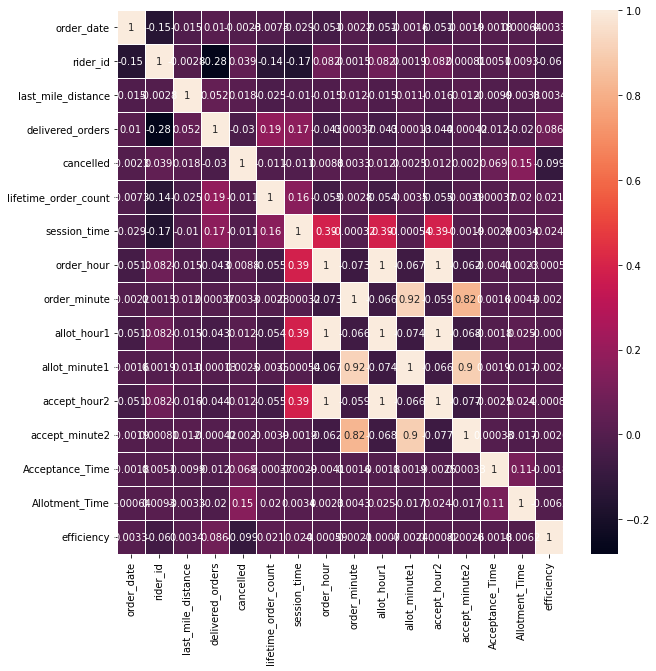

In [41]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0)
plt.show()

In [42]:
train.describe()

,order_date,rider_id,last_mile_distance,delivered_orders,cancelled,lifetime_order_count,session_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2,Acceptance_Time,Allotment_Time,efficiency
count,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432659.000000,432520.000000,432520.000000,432659.000000,432659.000000,432659.000000
mean,5.211781,7626.979559,2.972894,103.950448,0.010084,878.266279,222.139299,12.730411,30.596072,12.750487,30.598437,12.767652,30.567097,64.620107,73.177537,0.991057
std,3.275292,5521.688329,1.886151,89.639646,0.099912,1514.971489,176.807375,3.621328,17.191652,3.622716,17.213834,3.623117,17.270339,610.632316,270.485397,0.023458
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
25%,2.000000,2733.000000,1.470000,36.000000,0.000000,179.000000,86.150000,9.000000,16.000000,9.000000,16.000000,9.000000,16.000000,14.000000,1.000000,0.988764
50%,5.000000,6590.000000,2.670000,81.000000,0.000000,416.000000,178.666667,14.000000,32.000000,14.000000,32.000000,14.000000,32.000000,36.000000,14.000000,1.000000
75%,8.000000,11722.000000,4.230000,146.000000,0.000000,977.000000,318.750000,16.000000,45.000000,16.000000,45.000000,16.000000,45.000000,62.000000,48.000000,1.000000
max,11.000000,21566.000000,22.410000,562.000000,1.000000,30469.000000,1298.966667,21.000000,59.000000,21.000000,59.000000,21.000000,59.000000,86388.000000,28549.000000,1.000000


In [43]:
train['accept_hour2']=train['accept_hour2'].fillna(13)
train['accept_minute2']=train['accept_minute2'].fillna(30)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
X_train, X_test, y_train, y_test = train_test_split(train[feature_cols], train[target_col], 
                                                    stratify=train[target_col], 
                                                    test_size=0.1, random_state=42, 
                                                    shuffle=True)

In [45]:
X_train

,order_date,rider_id,last_mile_distance,delivered_orders,lifetime_order_count,session_time,order_hour,order_minute,allot_hour1,allot_minute1,accept_hour2,accept_minute2,Acceptance_Time,Allotment_Time,efficiency
323262,8.0,719,4.25,41.0,2404.0,146.733333,9,11,9,20,9.0,20.0,8.0,560,0.976190
35487,0.0,8470,1.92,31.0,211.0,224.833333,17,19,17,19,17.0,20.0,44.0,1,0.968750
123746,3.0,15223,3.75,68.0,576.0,44.116667,8,15,8,15,8.0,16.0,41.0,20,0.985507
328337,8.0,16214,4.46,87.0,472.0,4.833333,13,36,13,36,13.0,38.0,106.0,1,1.000000
441752,11.0,2458,0.58,49.0,141.0,73.316667,7,21,7,21,7.0,22.0,66.0,12,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188993,4.0,1265,0.76,118.0,829.0,564.483333,16,27,16,27,16.0,28.0,29.0,40,0.983333
154177,3.0,2942,1.30,12.0,816.0,541.016667,17,2,17,3,17.0,3.0,31.0,34,1.000000
214768,5.0,10241,0.89,130.0,759.0,36.916667,14,7,14,7,14.0,8.0,73.0,1,0.977444
6538,0.0,3547,4.29,83.0,995.0,131.266667,8,5,8,16,8.0,17.0,51.0,632,1.000000


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389393 entries, 323262 to 243215
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_date            389393 non-null  float64
 1   rider_id              389393 non-null  int64  
 2   last_mile_distance    389393 non-null  float64
 3   delivered_orders      389393 non-null  float64
 4   lifetime_order_count  389393 non-null  float64
 5   session_time          389393 non-null  float64
 6   order_hour            389393 non-null  int64  
 7   order_minute          389393 non-null  int64  
 8   allot_hour1           389393 non-null  int64  
 9   allot_minute1         389393 non-null  int64  
 10  accept_hour2          389393 non-null  float64
 11  accept_minute2        389393 non-null  float64
 12  Acceptance_Time       389393 non-null  float64
 13  Allotment_Time        389393 non-null  int16  
 14  efficiency            389393 non-null  float64


In [47]:
test['delivered_orders']=test['delivered_orders'].fillna(108)
test['accept_hour2']=test['accept_hour2'].fillna(13)
test['accept_minute2']=test['accept_minute2'].fillna(30)

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_date            144844 non-null  float64
 1   rider_id              144844 non-null  int64  
 2   last_mile_distance    144844 non-null  float64
 3   delivered_orders      144844 non-null  float64
 4   lifetime_order_count  144844 non-null  float64
 5   session_time          144844 non-null  float64
 6   order_hour            144844 non-null  int64  
 7   order_minute          144844 non-null  int64  
 8   allot_hour1           144844 non-null  int64  
 9   allot_minute1         144844 non-null  int64  
 10  accept_hour2          144844 non-null  float64
 11  accept_minute2        144844 non-null  float64
 12  Acceptance_Time       144844 non-null  float64
 13  Allotment_Time        144844 non-null  int16  
 14  efficiency            144844 non-null  float64
dtype

In [49]:
#obtained by optuna hypertunung
model1 = XGBClassifier( n_estimators=600, learning_rate=0.013185216741789522,
                       subsample=0.9, colsample_bytree=0.8,
                       reg_alpha=6, reg_lambda=5, max_depth=5, 
                       min_child_weight=184, scale_pos_weight=45)
model1.fit(X_train, y_train, eval_metric='auc')

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.013185216741789522, max_delta_step=0, max_depth=5,
              min_child_weight=184, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=2, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=6, reg_lambda=5, scale_pos_weight=45,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [50]:
print(f"Training ROC: {roc_auc_score(y_train, model1.predict_proba(X_train)[:, 1])}")
print(f"Validation ROC: {roc_auc_score(y_test, model1.predict_proba(X_test)[:, 1])}")

Training ROC: 0.7955622945516003
Validation ROC: 0.7599377312052986


In [51]:
model2 = CatBoostClassifier()
model2.fit(X_train, y_train)

Learning rate set to 0.131531
0:	learn: 0.4364763	total: 171ms	remaining: 2m 51s
1:	learn: 0.2854480	total: 266ms	remaining: 2m 12s
2:	learn: 0.1978211	total: 359ms	remaining: 1m 59s
3:	learn: 0.1439572	total: 448ms	remaining: 1m 51s
4:	learn: 0.1118746	total: 548ms	remaining: 1m 49s
5:	learn: 0.0916330	total: 643ms	remaining: 1m 46s
6:	learn: 0.0781410	total: 736ms	remaining: 1m 44s
7:	learn: 0.0694605	total: 826ms	remaining: 1m 42s
8:	learn: 0.0638186	total: 914ms	remaining: 1m 40s
9:	learn: 0.0596369	total: 992ms	remaining: 1m 38s
10:	learn: 0.0568337	total: 1.07s	remaining: 1m 35s
11:	learn: 0.0547639	total: 1.15s	remaining: 1m 34s
12:	learn: 0.0534237	total: 1.24s	remaining: 1m 33s
13:	learn: 0.0523115	total: 1.31s	remaining: 1m 32s
14:	learn: 0.0514676	total: 1.39s	remaining: 1m 31s
15:	learn: 0.0508594	total: 1.48s	remaining: 1m 30s
16:	learn: 0.0504698	total: 1.56s	remaining: 1m 29s
17:	learn: 0.0501275	total: 1.63s	remaining: 1m 29s
18:	learn: 0.0498582	total: 1.72s	remaining:

In [52]:
print(f"Training ROC: {roc_auc_score(y_train, model2.predict_proba(X_train)[:, 1])}")
print(f"Validation ROC: {roc_auc_score(y_test, model2.predict_proba(X_test)[:, 1])}")

Training ROC: 0.8596393423333221
Validation ROC: 0.7597988741493465


In [53]:
model3 = LGBMClassifier()
model3.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMClassifier()

In [54]:
print(f"Training ROC: {roc_auc_score(y_train, model3.predict_proba(X_train)[:, 1])}")
print(f"Validation ROC: {roc_auc_score(y_test, model3.predict_proba(X_test)[:, 1])}")

Training ROC: 0.8629706102716617
Validation ROC: 0.7544988508012261


In [55]:
model4 =GradientBoostingClassifier()
model4.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [56]:
print(f"Training ROC: {roc_auc_score(y_train, model4.predict_proba(X_train)[:, 1])}")
print(f"Validation ROC: {roc_auc_score(y_test, model4.predict_proba(X_test)[:, 1])}")

Training ROC: 0.7311653798814031
Validation ROC: 0.7411350774450731


In [57]:
model5 =RandomForestClassifier()
model5.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [58]:
print(f"Training ROC: {roc_auc_score(y_train, model5.predict_proba(X_train)[:, 1])}")
print(f"Validation ROC: {roc_auc_score(y_test, model5.predict_proba(X_test)[:, 1])}")

Training ROC: 1.0
Validation ROC: 0.7014679595242125


##### 